# Comprehensive Analysis of Machine Learning Models for Well Logs

## Introduction
This notebook consolidates the analysis of machine learning models applied to well log data using three different approaches: **Default**, **GridSearch**, and **Optuna**.

The focus is on evaluating the performance of these models using metrics such as **MAE**, **NMSE**, **MAPE**, **R2**, and the **Ensemble Metric**. Results are analyzed by individual wells and aggregated to draw broader insights into model performance.

---


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../.")
from geothermal_prediction.ml_well_gridsearch import compute_nmse, compute_mape, compute_mae, compute_r2, compute_ensemble_metric

In [2]:
# Load results
default_results = pd.read_csv('../data/results/default_results.csv')
gridsearch_results = pd.read_csv('../data/results/gridsearch_results.csv')
optuna_results = pd.read_csv('../data/results/optuna_results.csv')


## Summarize Results

In [3]:
def summarize_results(results, method_name):
    """
    Summarizes the performance metrics for a given dataset.

    Parameters:
        results (pd.DataFrame): DataFrame containing the results (e.g., y_true, y_pred).
        method_name (str): Name of the method (e.g., Default, GridSearch, Optuna).

    Returns:
        pd.DataFrame: Summary table with metrics.
    """
    summary = results.groupby('Model').apply(lambda group: pd.Series({
        'NMSE': compute_nmse(group['Th_Cond_y_true'], group['Th_Cond_y_pred']),
        'MAPE': compute_mape(group['Th_Cond_y_true'], group['Th_Cond_y_pred']),
        'MAE': compute_mae(group['Th_Cond_y_true'], group['Th_Cond_y_pred']),
        'R2': compute_r2(group['Th_Cond_y_true'], group['Th_Cond_y_pred']),
        'Ensemble_Metric': compute_ensemble_metric(group['Th_Cond_y_true'], group['Th_Cond_y_pred'])
    })).reset_index()
    summary['Method'] = method_name
    return summary

# Generate summaries for each approach
default_summary = summarize_results(default_results, 'Default')
gridsearch_summary = summarize_results(gridsearch_results, 'GridSearch')
optuna_summary = summarize_results(optuna_results, 'Optuna')

# Combine all summaries into one DataFrame for comparison
all_summaries = pd.concat([default_summary, gridsearch_summary, optuna_summary], ignore_index=True)

print("\n Combined Summary of All Methods:")
print(all_summaries)


 Combined Summary of All Methods:
                    Model      NMSE       MAPE       MAE        R2  \
0           LGBMRegressor  0.797291  27.261950  0.551218  0.202709   
1   RandomForestRegressor  0.955755  30.308153  0.591345  0.044245   
2                   Ridge  0.589314  23.236129  0.479416  0.410686   
3            XGBRegressor  1.300819  34.977454  0.657169 -0.300819   
4           LGBMRegressor  0.730178  25.094896  0.521711  0.269822   
5   RandomForestRegressor  0.789845  27.210077  0.544605  0.210155   
6                   Ridge  0.589078  23.229317  0.479324  0.410922   
7            XGBRegressor  0.746896  26.123908  0.528942  0.253104   
8           LGBMRegressor  0.692177  24.254149  0.506971  0.307823   
9   RandomForestRegressor  0.788017  27.117138  0.543405  0.211983   
10                  Ridge  0.589160  23.230155  0.479334  0.410840   
11           XGBRegressor  0.561818  20.814123  0.457754  0.438182   

    Ensemble_Metric      Method  
0          0.704695 

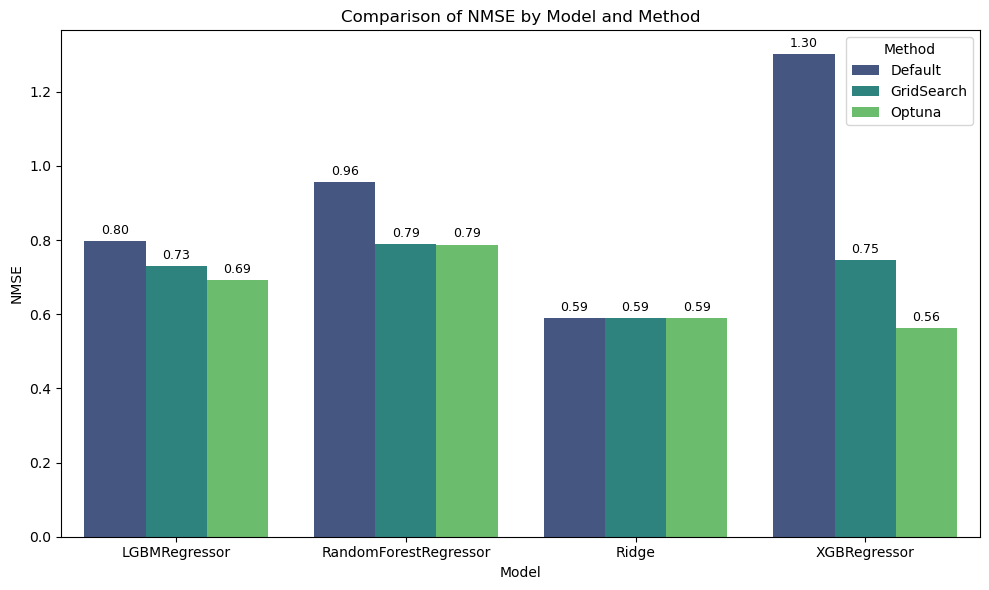

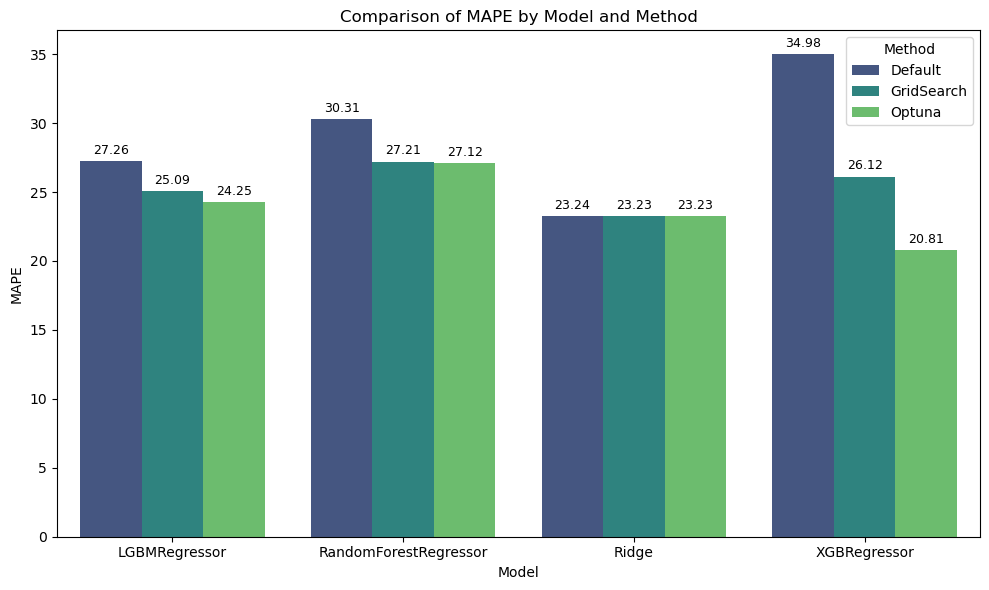

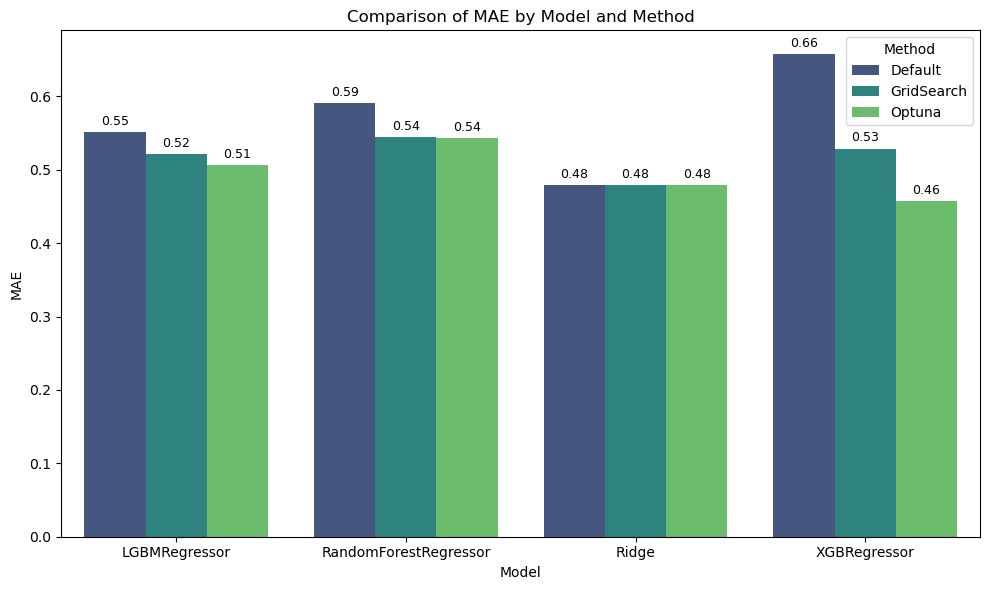

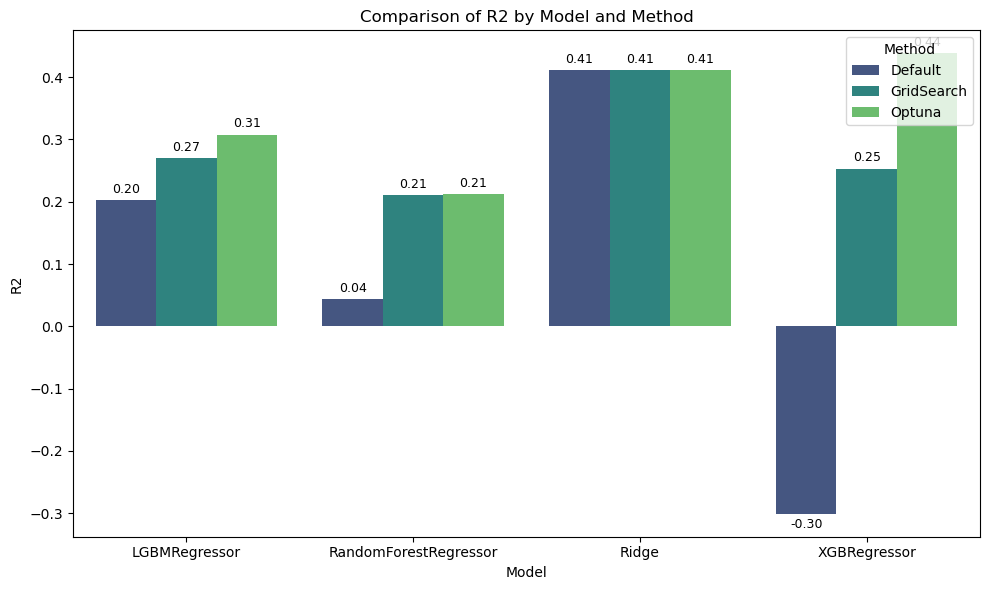

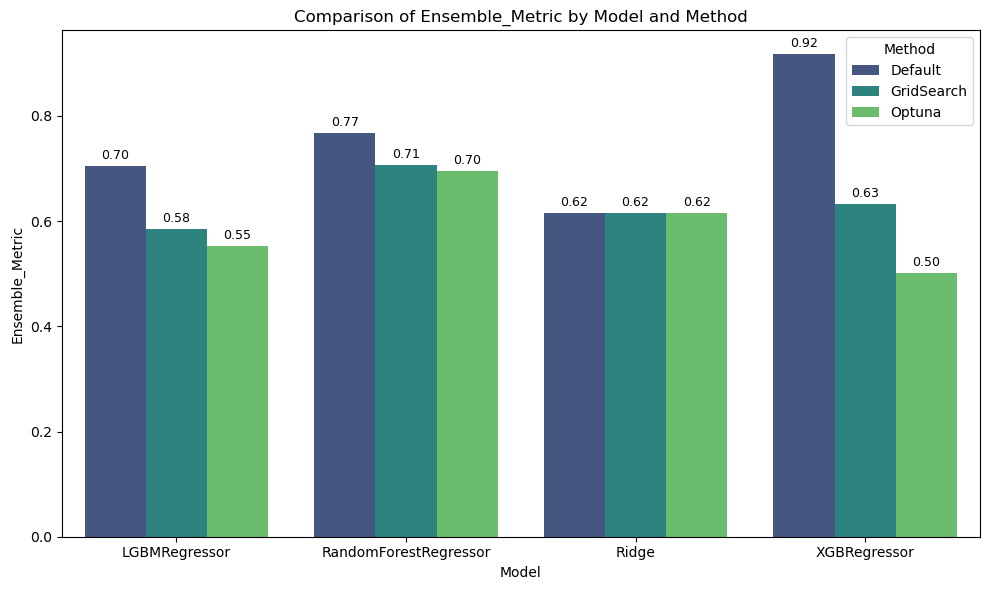

In [4]:
def plot_metric_comparison(data, metrics, hue_column, x_column='Model', figsize=(10, 6)):
    """
    Plots bar comparisons for multiple metrics.

    Parameters:
        data (pd.DataFrame): Data containing metrics and model/method information.
        metrics (list): List of metric names to plot.
        hue_column (str): Column used for hue differentiation (e.g., 'Method').
        x_column (str): Column to use for x-axis (default is 'Model').
        figsize (tuple): Figure size.
    """
    for metric in metrics:
        plt.figure(figsize=figsize)
        ax = sns.barplot(
            data=data,
            x=x_column,
            y=metric,
            hue=hue_column,
            palette='viridis'
        )
        plt.title(f"Comparison of {metric} by {x_column} and {hue_column}")
        plt.ylabel(metric)
        plt.xlabel(x_column)
        plt.legend(title=hue_column, loc='upper right')

        # Annotate bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

        plt.tight_layout()
        plt.show()

# Define metrics and plot
metrics = ['NMSE', 'MAPE', 'MAE', 'R2', 'Ensemble_Metric']
plot_metric_comparison(all_summaries, metrics, hue_column='Method')


---
## Analysis of Results
1. **Normalized Mean Squared Error (NMSE):**
   - Optuna Optimization consistently yields the lowest NMSE across all models, demonstrating superior ability to minimize error relative to the variance of the data.
   - XGBRegressor shows the most significant improvement under Optuna, achieving a notable reduction in NMSE compared to both Default and GridSearch configurations.
   - LGBMRegressor and RandomForestRegressor also benefit from Optuna but to a lesser extent compared to XGBRegressor.
2. **Mean Absolute Percentage Error (MAPE):**
   - MAPE values reflect Optuna’s effectiveness in improving accuracy. The most substantial improvement is observed for XGBRegressor, which experiences a sharp decline in MAPE.
   - Ridge performs consistently well across all approaches, reflecting its robustness as a baseline model.
3. **Mean Absolute Error (MAE):**
   - Optuna minimizes MAE across all models, with XGBRegressor emerging as the standout performer under this metric.
   - Ridge maintains a low and stable MAE, further reinforcing its reliability.
4. **R2 Score:**
   - Optuna provides the best R2 values for all models, indicating better explanatory power of predictions.
   - XGBRegressor demonstrates the largest improvement in R², transitioning from negative (Default configuration) to positive values under Optuna.
   - Ridge consistently achieves high R² scores, further confirming its stability.
5. **Ensemble Metric (MAE + |Bias|):**
   - Optuna again leads in minimizing the ensemble metric, showcasing its ability to reduce both error magnitude and systematic bias.
   - The ensemble metric provides a holistic view of model performance, reinforcing the improvements achieved by hyperparameter optimization.

---
## Complementary Analysis of Results from Machine Learning Notebooks
This complementary analysis is based on the results of the notebooks: `05_ml_default_modeling.ipynb`, `05_ml_gridsearch_modeling.ipynb`, `05_ml_optuna_modeling.ipynb`.

### 1. Residual Analysis by Well

#### Well: E18-05
- **Default:** Residuals exhibit moderate variability with a tendency toward underprediction at greater depths.
- **GridSearch:** Improves the spread, reducing variability and bias.
- **Optuna:** Achieves the tightest residual clustering, minimizing systematic errors.

#### Well: K18-07x
- **Default:** Residuals show high variability and overprediction at shallower depths.
- **GridSearch:** Reduces variability but retains some bias in deeper sections.
- **Optuna:** Delivers the most balanced residual distribution, with minimal bias.

#### Well: K18-08
- **Default:** Residuals are widely spread, with significant overprediction at intermediate depths.
- **GridSearch:** Narrows the spread but does not eliminate systematic overprediction.
- **Optuna:** Corrects systematic overprediction and reduces error magnitude.

#### Well: ZRP-03a
- **Default:** Residuals are highly variable with no consistent pattern.
- **GridSearch:** Improves residual distribution by clustering closer to zero.
- **Optuna:** Shows the best residual distribution, tightly centered around zero.



### 2. Predictions vs. True Values

#### Well: E18-05
- **Default:** Predictions deviate significantly from true values at greater depths.
- **GridSearch:** Reduces deviations, improving alignment.
- **Optuna:** Predictions closely match true values.

#### Well: K18-07x
- **Default:** Predictions consistently overestimate true values.
- **GridSearch:** Reduces overestimation but leaves some discrepancies.
- **Optuna:** Aligns predictions closely with true values.

#### Well: K18-08
- **Default:** Predictions are widely scattered, showing systematic errors.
- **GridSearch:** Reduces scatter, improving alignment.
- **Optuna:** Delivers the most accurate predictions.

#### Well: ZRP-03a
- **Default:** Predictions poorly align with true values, showing inconsistency.
- **GridSearch:** Improves alignment with moderate discrepancies.
- **Optuna:** Achieves the best alignment, minimizing errors.


### 3. Global Observations

#### Performance by Method
- **Default:**
    - Baseline results highlight significant room for improvement, with high residual variability and poor alignment of predictions.
- **GridSearch:**
    - Delivers moderate improvements by optimizing hyperparameters, reducing residual spread, and improving accuracy.
- **Optuna:**
    - Consistently outperforms Default and GridSearch approaches across all wells and metrics.
    - Delivers tighter residual distributions and better alignment of predictions.

#### Tendency Toward Mean Predictions
- Across most models and wells, there is a noticeable tendency for predictions to cluster around the mean of the target variable.
- This is particularly evident in the Default approach, where insufficient optimization often leads models to prioritize minimizing overall variance rather than capturing more nuanced patterns.
- GridSearch and Optuna show improvements, though some models still exhibit this tendency to varying degrees.
- This behavior highlights the importance of careful hyperparameter tuning and feature selection to avoid overgeneralization.

---

## Conclusion

- The analysis confirms that **Optuna Optimization** consistently delivers the best performance across all evaluation metrics, making it a crucial method for model improvement.
- **XGBRegressor** benefits the most from Optuna hyperparameter tuning, with significant enhancements in predictive accuracy, error reduction, and explanatory power.
- **Ridge** continues to provide a reliable baseline with stable performance, serving as an effective model for comparison and validation.
- The improvements achieved with Optuna showcase the importance of advanced optimization techniques in leveraging the full potential of machine learning models, even with limited datasets.

---

## Future Work

- **Dataset Scalability**
   - Validate current findings on larger datasets to confirm robustness and scalability of models and optimization strategies.
   - Incorporate additional wells and historical data to enhance training and testing sets.

- **Expansion of Features**
   - **Incorporate Geological Data**: Adding depth-specific geological features can improve model understanding of underlying dependencies.
   - **Feature Engineering**: Develop new features that capture domain-specific insights. Additionally, apply statistical techniques (e.g., moving averages, decomposition) and time series methods to enhance feature representations and capture temporal trends, such as lags or percentage changes. Exploring interactions between geological and temporal features could further improve predictive power.
   
- **Experimentation with Metrics**
   - The framework allows flexibility to optimize models based on various evaluation metrics. Future work should:
      - Experiment with metrics such as NMSE, MAPE, and Ensemble Metric to identify the most suitable metric for well log predictions.
      - Analyze how the choice of metric influences model performance and parameter selection.

---

